# K Nearest Neighbours Project
## Table of contents
### Explore Data Analysis (EDA)

* [0. Problem Statement](#co)
* [1. Importing libraries](#c1)
* [2. Data Collection](#c2)
* [3. Exploration and Data Cleaning](#c3)
  * [3.1 Drop Null Values](#c3-1)
  * [3.2 Drop Duplicate Information](#c3-2)
  * [3.2 Drop Irrelevant Information](#c3-3)
* [4. Univariate Analysis](#c4)
  * [4.1 Dividing our dataset into categorical and numerical](#c4-1)
  * [4.2 Numerical Variable Analysis](#c4-2)
* [5. Multivariate Analysis](#c5)
  * [5.1 Numerical-Numerical Analysis](#c5-2)
  * [5.2 Correlation Analysis](#c5-2)
  * [5.3 Pairplot Analysis](#c5-3)
* [6. Feature Engineering](#c6)
  * [6.1 Outliers Analysis](#c6-1)
  * [6.2 Missing Values Analysis](#c6-2)
  * [6.3 Split train/test of both Data Frames](#c6-3)
* [7. Data Processing](#c7)
  * [7.1 Normalization](#c7-1)
  * [7.2 Minmax Scalation](#c7-2)

### Machine Learning

* [8. Machine Learning](#c8)
  * [8.1 Which is the best dataset?](#c8-1)
  * [8.2 Model Optimization](#c8-2)
  * [8.3 Evaluation of the Model](#c8-3)

## 0. Problem Statement <a id='c0'></a>

The objective of this exercise is to conduct an in-depth EDA analysis and develop a predictive K Nearest Neighbours (KNN) to determine the quality of red wine from their chemicals characteristics.

## 1. Importing libraries <a id='c1'></a>

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import json
import warnings
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix, classification_report

def warn(*args, **kwargs):
    pass
warnings.warn = warn
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', None)

## 2. Data Collection <a id='c2'></a>

In [73]:
URL = 'https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv'

def get_data(URL:str) -> pd.DataFrame:
    total_data = pd.read_csv(URL, sep=';')
    return total_data

get_data(URL)
total_data = get_data(URL)
total_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 3. Exploration and Data Cleaning <a id='c3'></a>

#### 3.1 Drop Null Values <a id='c3-1'></a>

In this case, we don't delete any row beacause there is no data wihout values.

In [74]:
total_data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### 3.2 Drop Duplicate Information <a id='c3-2'></a>

Since there is duplicated rows we'll delete them

In [75]:
rows = total_data.shape[0]
duplicated_rows = total_data.duplicated().sum()
print(f'We have {duplicated_rows} rows of {rows}')

We have 240 rows of 1599


In [76]:
rows = total_data.shape[0]
total_data = total_data.drop_duplicates()
total_data.duplicated().sum()
print(f'Now we have {rows} rows')

Now we have 1599 rows


#### 3.3 Drop Irrelevant Information <a id='c3-3'></a>

Since al data is relevant, we won't delete any column.

## 4. Univariate Analysis <a id='c4'></a>

### 4.1 Dividing our dataset into categorical and numerical <a id='c4-1'></a>

In [77]:
numerical_variables = total_data.select_dtypes(include=['number']).columns.tolist()
print("Numerical Variables:", numerical_variables)

categorical_variables = total_data.select_dtypes(exclude=['number']).columns.tolist()
print("Categorical Variables:", categorical_variables)

print(total_data.dtypes)

Numerical Variables: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
Categorical Variables: []
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


### 4.2 Numerical Variable Analysis <a id='c4-2'></a>

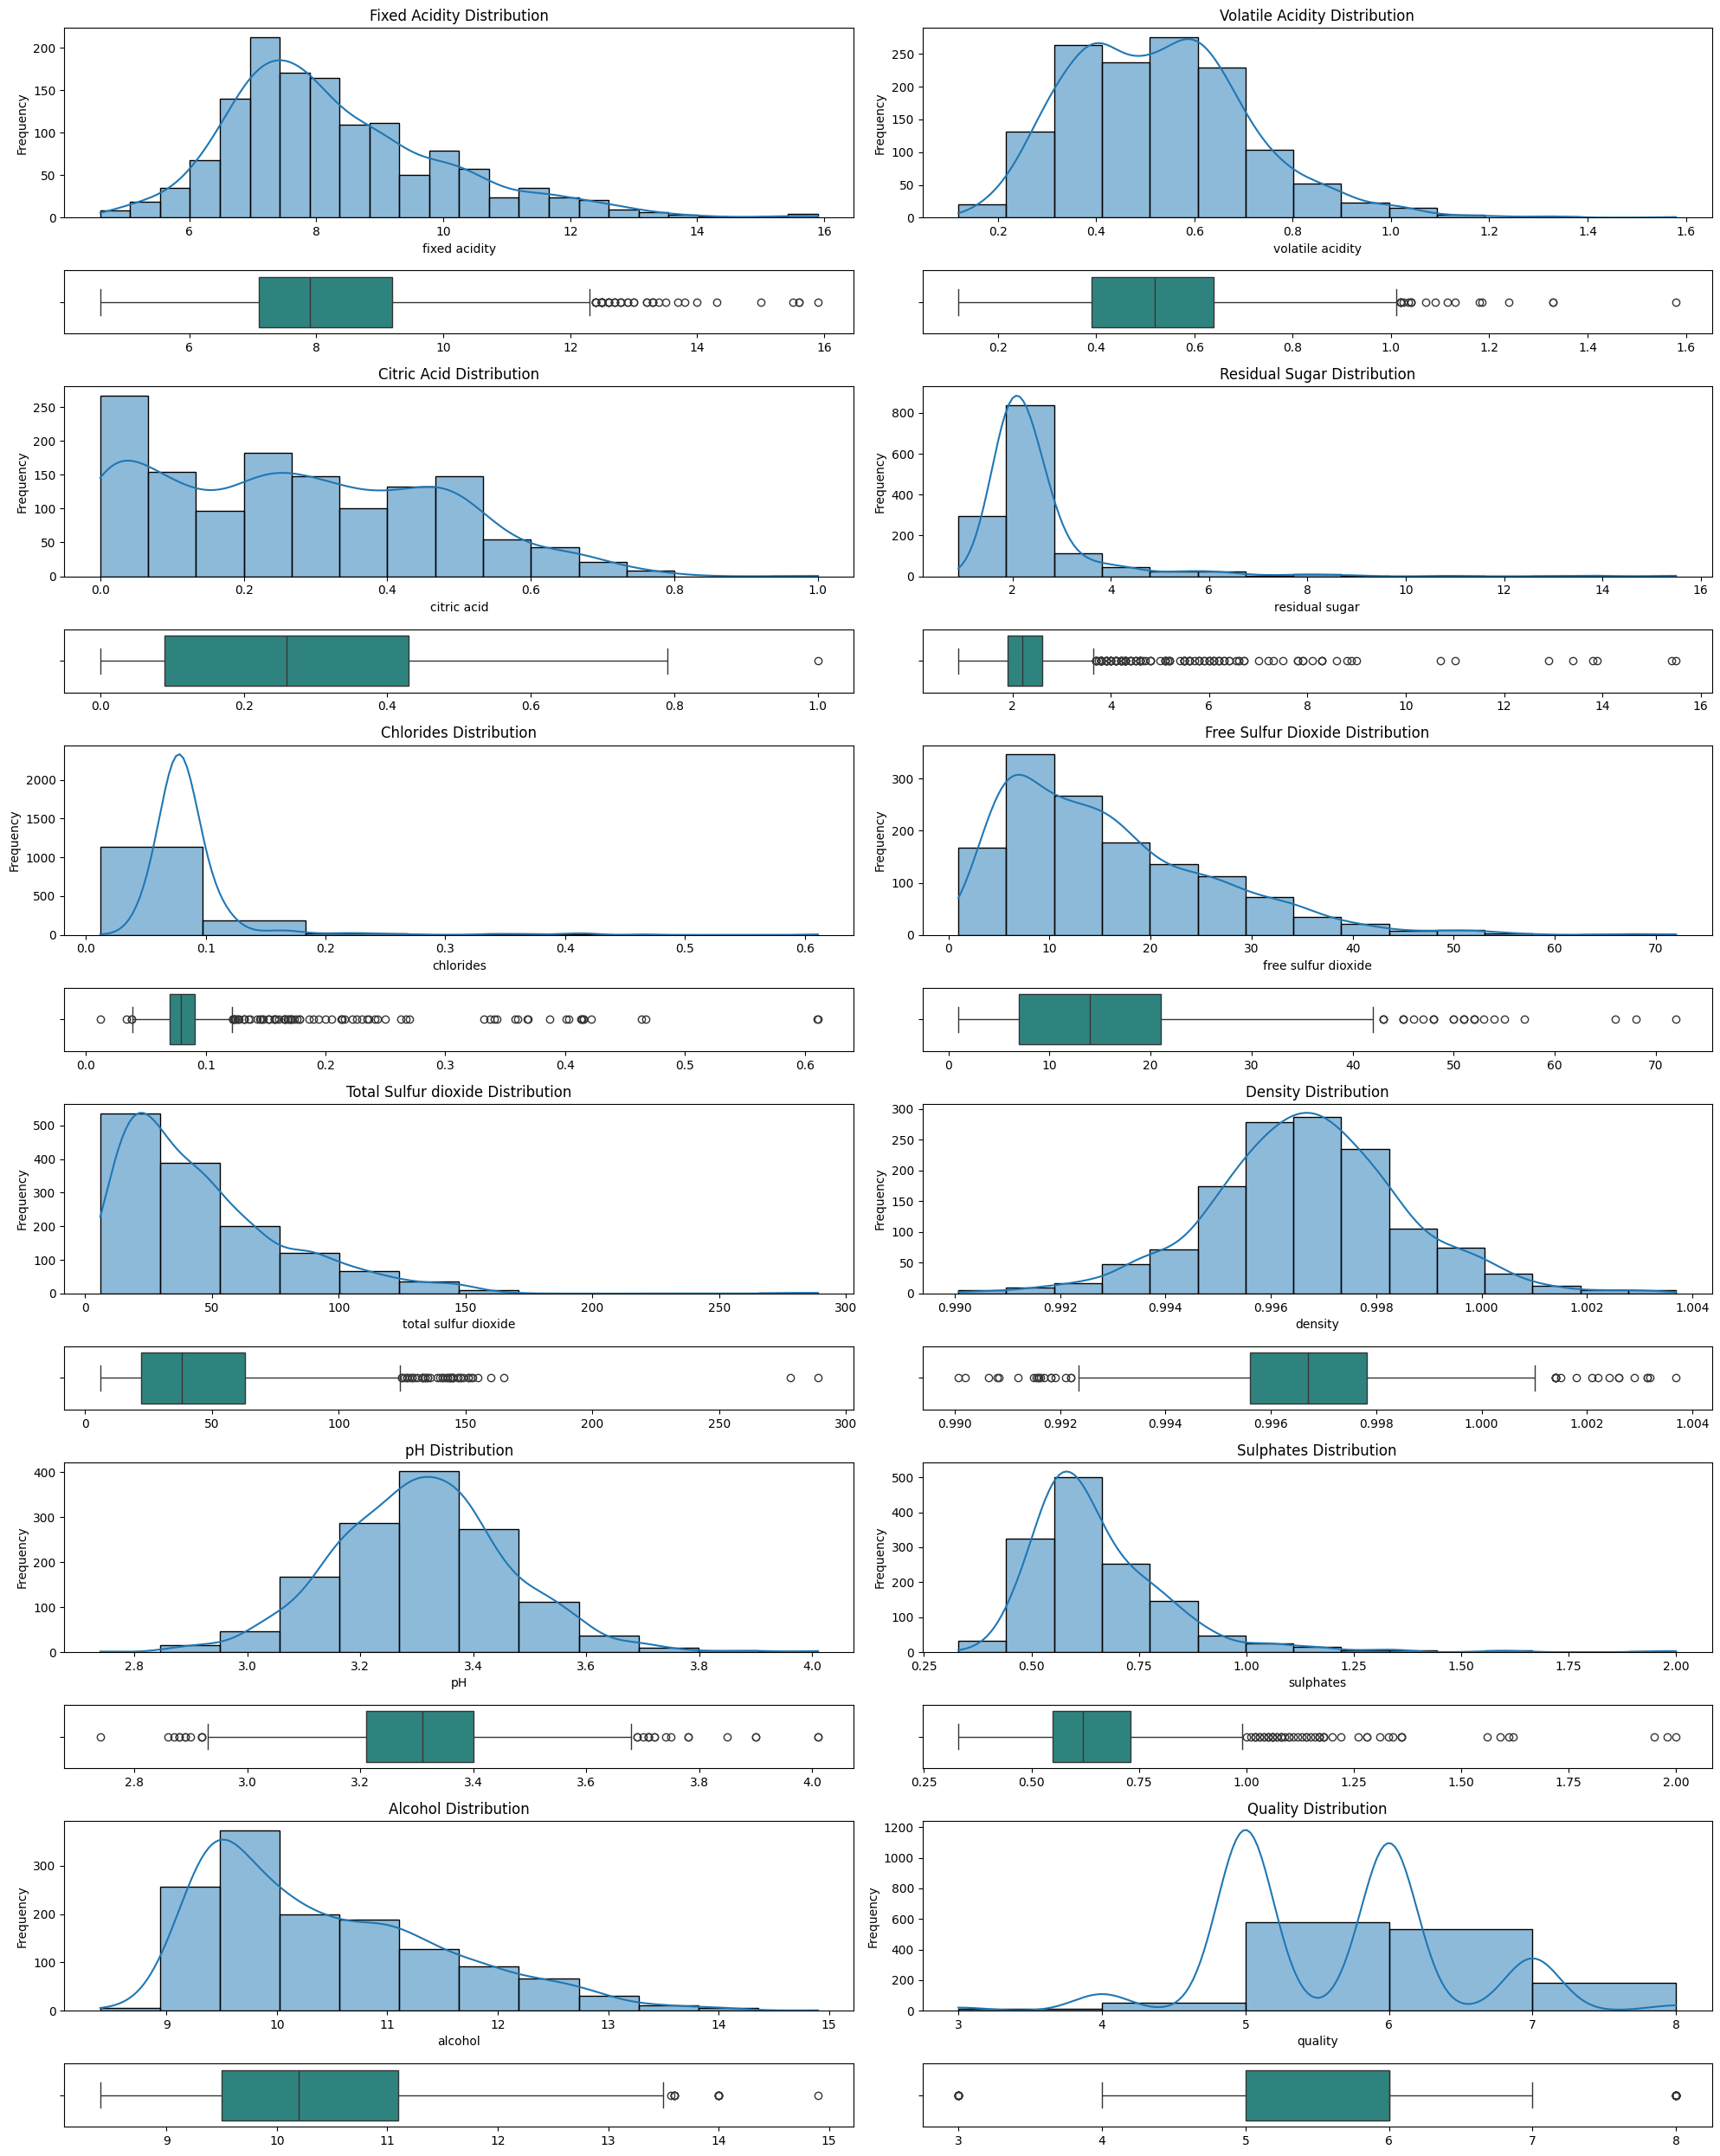

In [78]:
num_vars = len(numerical_variables)
nrows = num_vars // 2 + (num_vars % 2)
total_rows = nrows * 2
fig, axes = plt.subplots(
    nrows = total_rows,
    ncols=2,
    figsize=(20, 25),
    gridspec_kw={"height_ratios": [6, 2] * nrows}
)

# --- Row 1, Column 1: 'fixed acidity' ---
# Histplot
sns.histplot(
    data=total_data, x='fixed acidity', kde=True, bins=24, ax=axes[0, 0], palette="viridis"
)
axes[0, 0].set_title("Fixed Acidity Distribution", fontsize=12)
axes[0, 0].set_ylabel("Frequency", fontsize=10)

# Boxplot
sns.boxplot(data=total_data, x="fixed acidity", ax=axes[1, 0], palette="viridis")
axes[1, 0].tick_params(axis="y", labelleft=False)
axes[1, 0].set_xlabel('')


# --- Row 1, Column 2: 'volatile acidity' ---
# Histplot
sns.histplot(
    data=total_data, x='volatile acidity', kde=True, bins=15, ax=axes[0, 1], palette="viridis"
)
axes[0, 1].set_title("Volatile Acidity Distribution", fontsize=12)
axes[0, 1].set_ylabel("Frequency", fontsize=10)

# Boxplot
sns.boxplot(data=total_data, x="volatile acidity", ax=axes[1, 1], palette="viridis")
axes[1, 1].tick_params(axis="y", labelleft=False)
axes[1, 1].set_xlabel('')


# --- Row 2, Column 1: 'citric acid' ---
# Histplot
sns.histplot(
    data=total_data, x='citric acid', kde=True, bins=15, ax=axes[2, 0], palette="viridis"
)
axes[2, 0].set_title("Citric Acid Distribution", fontsize=12)
axes[2, 0].set_ylabel("Frequency", fontsize=10)

# Boxplot
sns.boxplot(data=total_data, x="citric acid", ax=axes[3, 0], palette="viridis")
axes[3, 0].tick_params(axis="y", labelleft=False)
axes[3, 0].set_xlabel('')


# --- Row 2, Column 2: 'residual sugar' ---
# Histplot
sns.histplot(
    data=total_data, x='residual sugar', kde=True, bins=15, ax=axes[2, 1], palette="viridis"
)
axes[2, 1].set_title("Residual Sugar Distribution", fontsize=12)
axes[2, 1].set_ylabel("Frequency", fontsize=10)

# Boxplot
sns.boxplot(data=total_data, x="residual sugar", ax=axes[3, 1], palette="viridis")
axes[3, 1].tick_params(axis="y", labelleft=False)
axes[3, 1].set_xlabel('')


# --- Row 3, Column 1: 'chlorides' ---
# Histplot
sns.histplot(
    data=total_data, x='chlorides', kde=True, bins=7, ax=axes[4, 0], palette="viridis"
)
axes[4, 0].set_title("Chlorides Distribution", fontsize=12)
axes[4, 0].set_ylabel("Frequency", fontsize=10)

# Boxplot
sns.boxplot(data=total_data, x="chlorides", ax=axes[5, 0], palette="viridis")
axes[5, 0].tick_params(axis="y", labelleft=False)
axes[5, 0].set_xlabel('')


# --- Row 3, Column 2: 'free sulfur dioxide' ---
# Histplot
sns.histplot(
    data=total_data, x='free sulfur dioxide', kde=True, bins=15, ax=axes[4, 1], palette="viridis"
)
axes[4, 1].set_title("Free Sulfur Dioxide Distribution", fontsize=12)
axes[4, 1].set_ylabel("Frequency", fontsize=10)

# Boxplot
sns.boxplot(data=total_data, x="free sulfur dioxide", ax=axes[5, 1], palette="viridis")
axes[5, 1].tick_params(axis="y", labelleft=False)
axes[5, 1].set_xlabel('')


# --- Row 4, Column 1: 'total sulfur dioxide' ---
# Histplot
sns.histplot(
    data=total_data, x='total sulfur dioxide', kde=True, bins=12, ax=axes[6, 0], palette="viridis"
)
axes[6, 0].set_title("Total Sulfur dioxide Distribution", fontsize=12)
axes[6, 0].set_ylabel("Frequency", fontsize=10)

# Boxplot
sns.boxplot(data=total_data, x="total sulfur dioxide", ax=axes[7, 0], palette="viridis")
axes[7, 0].tick_params(axis="y", labelleft=False)
axes[7, 0].set_xlabel('')


# --- Row 4, Column 2: 'density' ---
# Histplot
sns.histplot(
    data=total_data, x='density', kde=True, bins=15, ax=axes[6, 1], palette="viridis"
)
axes[6, 1].set_title("Density Distribution", fontsize=12)
axes[6, 1].set_ylabel("Frequency", fontsize=10)

# Boxplot
sns.boxplot(data=total_data, x="density", ax=axes[7, 1], palette="viridis")
axes[7, 1].tick_params(axis="y", labelleft=False)
axes[7, 1].set_xlabel('')


# --- Row 5, Column 1: 'pH' ---
# Histplot
sns.histplot(
    data=total_data, x='pH', kde=True, bins=12, ax=axes[8, 0], palette="viridis"
)
axes[8, 0].set_title("pH Distribution", fontsize=12)
axes[8, 0].set_ylabel("Frequency", fontsize=10)

# Boxplot
sns.boxplot(data=total_data, x="pH", ax=axes[9, 0], palette="viridis")
axes[9, 0].tick_params(axis="y", labelleft=False)
axes[9, 0].set_xlabel('')


# --- Row 5, Column 2: 'sulphates' ---
# Histplot
sns.histplot(
    data=total_data, x='sulphates', kde=True, bins=15, ax=axes[8, 1], palette="viridis"
)
axes[8, 1].set_title("Sulphates Distribution", fontsize=12)
axes[8, 1].set_ylabel("Frequency", fontsize=10)

# Boxplot
sns.boxplot(data=total_data, x="sulphates", ax=axes[9, 1], palette="viridis")
axes[9, 1].tick_params(axis="y", labelleft=False)
axes[9, 1].set_xlabel('')


# --- Row 6, Column 1: 'alcohol' ---
# Histplot
sns.histplot(
    data=total_data, x='alcohol', kde=True, bins=12, ax=axes[10, 0], palette="viridis"
)
axes[10, 0].set_title("Alcohol Distribution", fontsize=12)
axes[10, 0].set_ylabel("Frequency", fontsize=10)

# Boxplot
sns.boxplot(data=total_data, x="alcohol", ax=axes[11, 0], palette="viridis")
axes[11, 0].tick_params(axis="y", labelleft=False)
axes[11, 0].set_xlabel('')


# --- Row 6, Column 2: 'quality' ---
# Histplot
sns.histplot(
    data=total_data, x='quality', kde=True, bins=5, ax=axes[10, 1], palette="viridis"
)
axes[10, 1].set_title("Quality Distribution", fontsize=12)
axes[10, 1].set_ylabel("Frequency", fontsize=10)

# Boxplot
sns.boxplot(data=total_data, x="quality", ax=axes[11, 1], palette="viridis")
axes[11, 1].tick_params(axis="y", labelleft=False)
axes[11, 1].set_xlabel('')


plt.tight_layout()
plt.show()

**Conclusions:**

- **Fixed Acidity**: The fixed acidity plot shows a right-skewed distribution with a peak on 7 as the most common acidity in red wines.
- **Volatile Acidity**: This is a positive bimodal distribution with the most common values around 0.3 and 0.7 an peaks in 0.4 and 0.6 with a big amount of outliers. Posively, we could group red wines in two major groups.
- **Citric Acid**: The plot shows a positive distribution with a peak near 0. This indicates that most red wines have a little to no citric acid at all.
- **Residual Sugar**: This is a notorious right-skewed distribution with a peak at 2 and a huge amount of outliers suggesting that there are a big diversity of red wines.
- **Chlorides**: The chlorides plot shows a highly right-skewed distribution with a big variety of outliers but with a high concentration of values around 0.0 and 0.2. This data suggests that saltiness taste is extremly rare in red wines.
- **Free Sulfur**: This feature exhibits a positive-skewed distribution with the majority of red wines having low levels of free sulfur dioxide with peak values from 15 up to 25.
- **Total Sulfur**: Similar at the free counterpart, the total sulfur dioxide disrtibution is right-skewed too having the most common values around 40-50. The plots shows a large tail of outliers too.
- **Density**: The density plot shows a normal and nearly symmetrical plot with a strong peak around 0.997. This plot has some outliers too.
- **pH**: Along with the density plot, the pH distribution is similar as it has a very symmetrical gaussian bell with a small amount of outliers with a peak value at 3.3.
- **Sulphates**: The sulphate distribution is positive-skewed with a strong concentration of wines between 0.5 and 0.7. The significant tail of outliers with very high sulphate levels is outstanding.
- **Alcohol**: The alcohol distribution is right-skewed with a clear peak around 9-10. However, the distribution is quite broad, extending up to 14. This tells that there are a large variety of red wines in the dataset.
- **Quality**: The quality distribution is clearly bimodal with two distinct peaks at 5 and 6 scores with rare cases of extremely low and high quality red wines in the set.

## 5. Multivariate Analysis <a id='c5'></a>

### 5.1 Numerical-Numerical Analysis <a id='c5-1'></a>

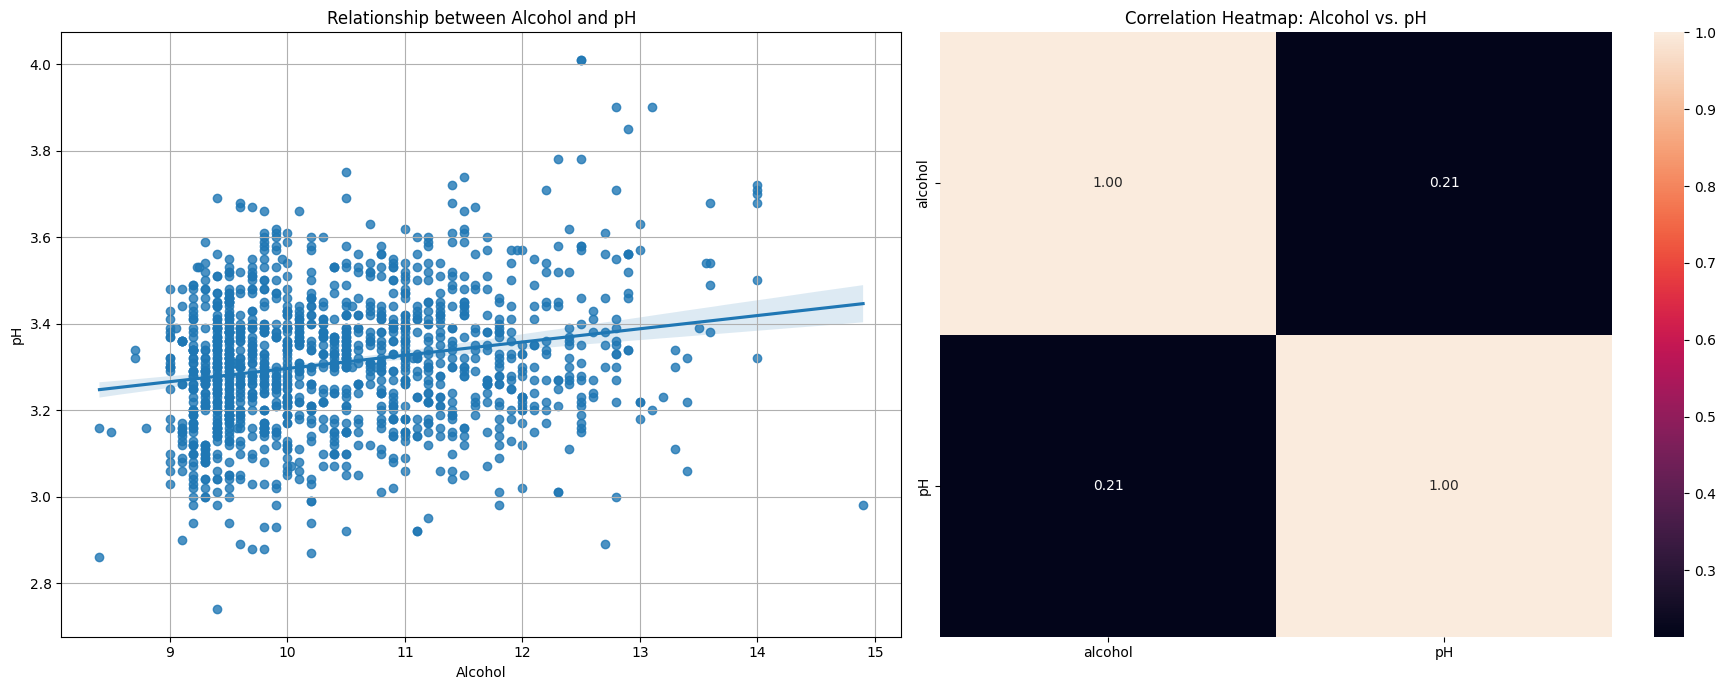

In [79]:
correlation_matrix_2_vars = total_data[['alcohol', 'pH']].corr()
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# --- Subplot 1: regplot ---
sns.regplot(data=total_data, x='alcohol', y='pH', ci=95, ax=axes[0])
axes[0].set_title('Relationship between Alcohol and pH')
axes[0].set_xlabel('Alcohol')
axes[0].set_ylabel('pH')
axes[0].grid(True)

# --- Subplot 2: heatmap ---
sns.heatmap(correlation_matrix_2_vars, annot=True, fmt=".2f", ax=axes[1])
axes[1].set_title('Correlation Heatmap: Alcohol vs. pH')
axes[1].set_xlabel('')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

We can see a positive but moderate correlation (0.21) between `alcohol` and `pH`. The *regplot* shows that as `alcohol` level increases, `pH` tends to increase slightly, although the data points are widely dispersed around the regression line. This suggests that, while there is a relationship, alcohol content alone is not a strong predictor of a wine's `pH`.

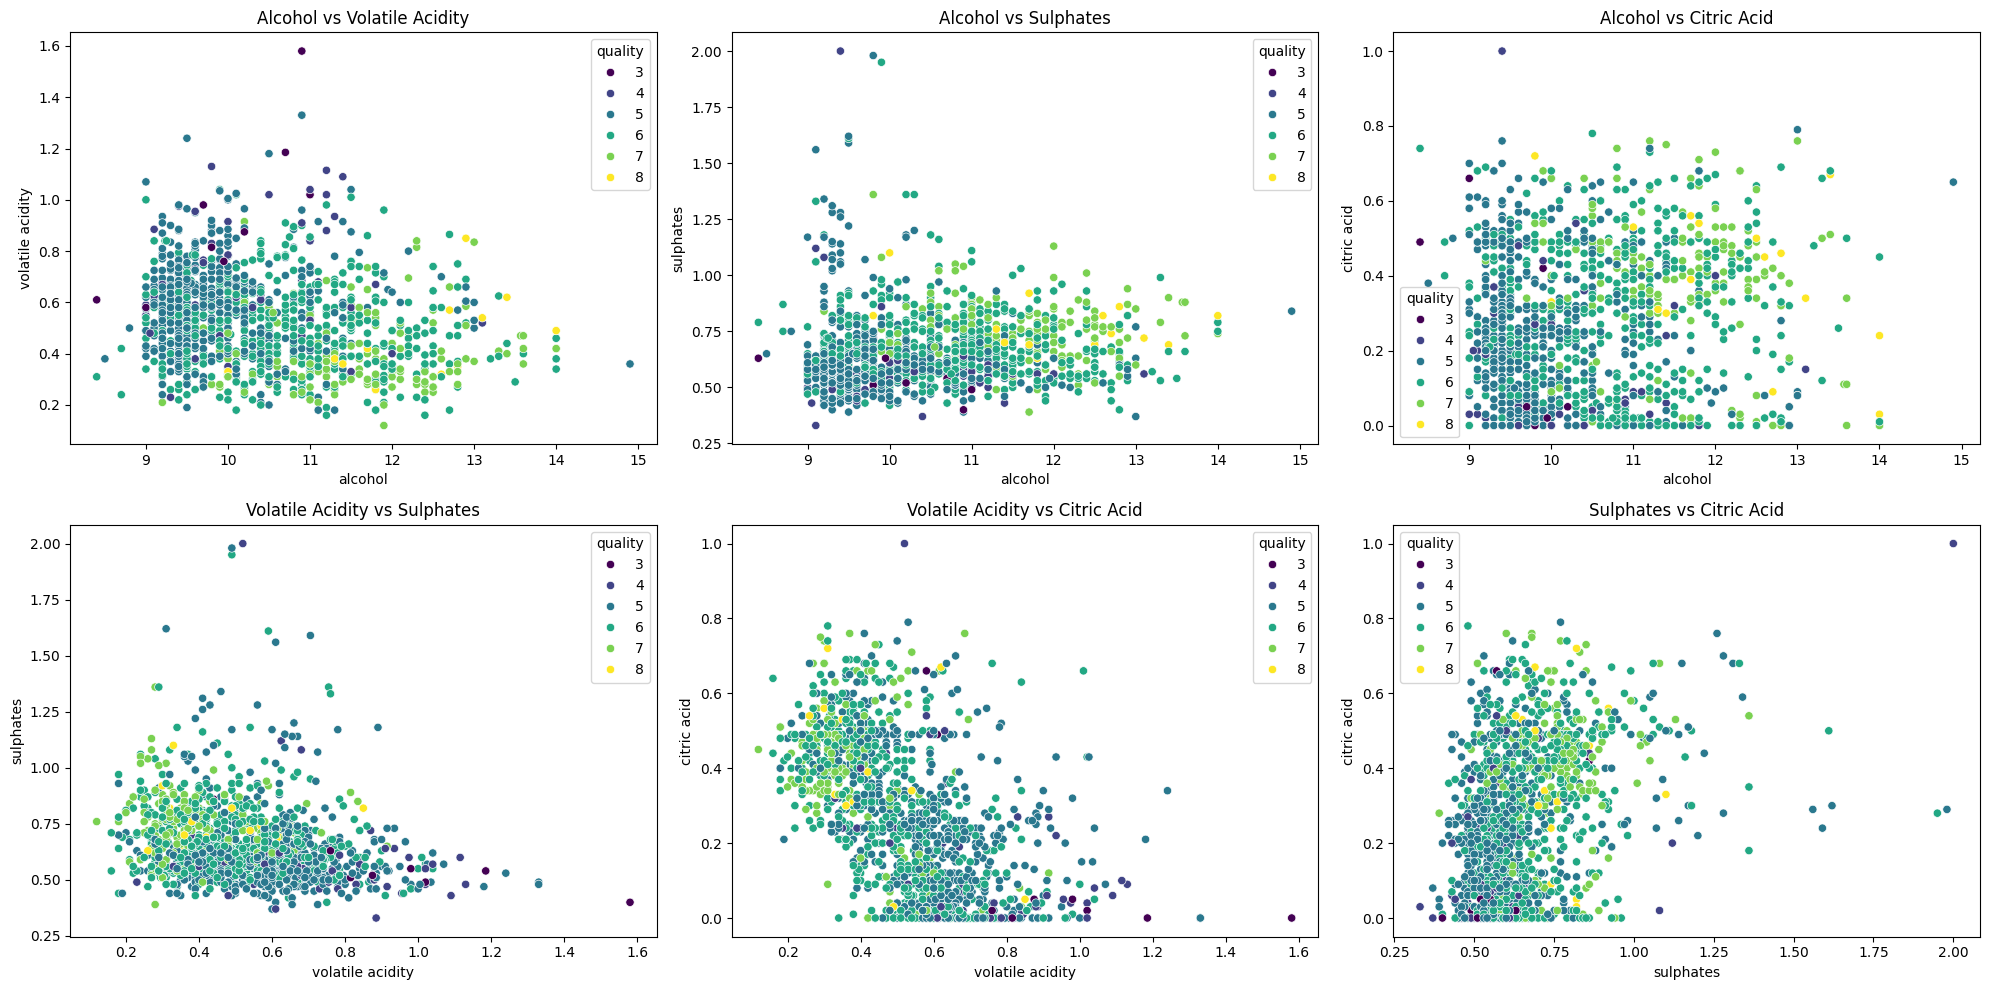

In [80]:
fig, axis = plt.subplots(2, 3, figsize = (20, 10))
palette = sns.color_palette("viridis", as_cmap=True)

sns.scatterplot(ax = axis[0, 0], data = total_data, x = "alcohol", y = "volatile acidity", hue = "quality", palette = palette)
axis[0, 0].set_title('Alcohol vs Volatile Acidity')
sns.scatterplot(ax = axis[0, 1], data = total_data, x = "alcohol", y = "sulphates", hue = "quality", palette = palette)
axis[0, 1].set_title('Alcohol vs Sulphates')
sns.scatterplot(ax = axis[0, 2], data = total_data, x = "alcohol", y = "citric acid", hue = "quality", palette = palette)
axis[0, 2].set_title('Alcohol vs Citric Acid')

sns.scatterplot(ax = axis[1, 0], data = total_data, x = "volatile acidity", y = "sulphates", hue = "quality", palette = palette)
axis[1, 0].set_title('Volatile Acidity vs Sulphates')
sns.scatterplot(ax = axis[1, 1], data = total_data, x = "volatile acidity", y = "citric acid", hue = "quality", palette = palette)
axis[1, 1].set_title('Volatile Acidity vs Citric Acid')
sns.scatterplot(ax = axis[1, 2], data = total_data, x = "sulphates", y = "citric acid", hue = "quality", palette = palette)
axis[1, 2].set_title('Sulphates vs Citric Acid')

plt.tight_layout()
plt.show()

### 5.2 Correlation Analysis <a id='c5-2'></a>

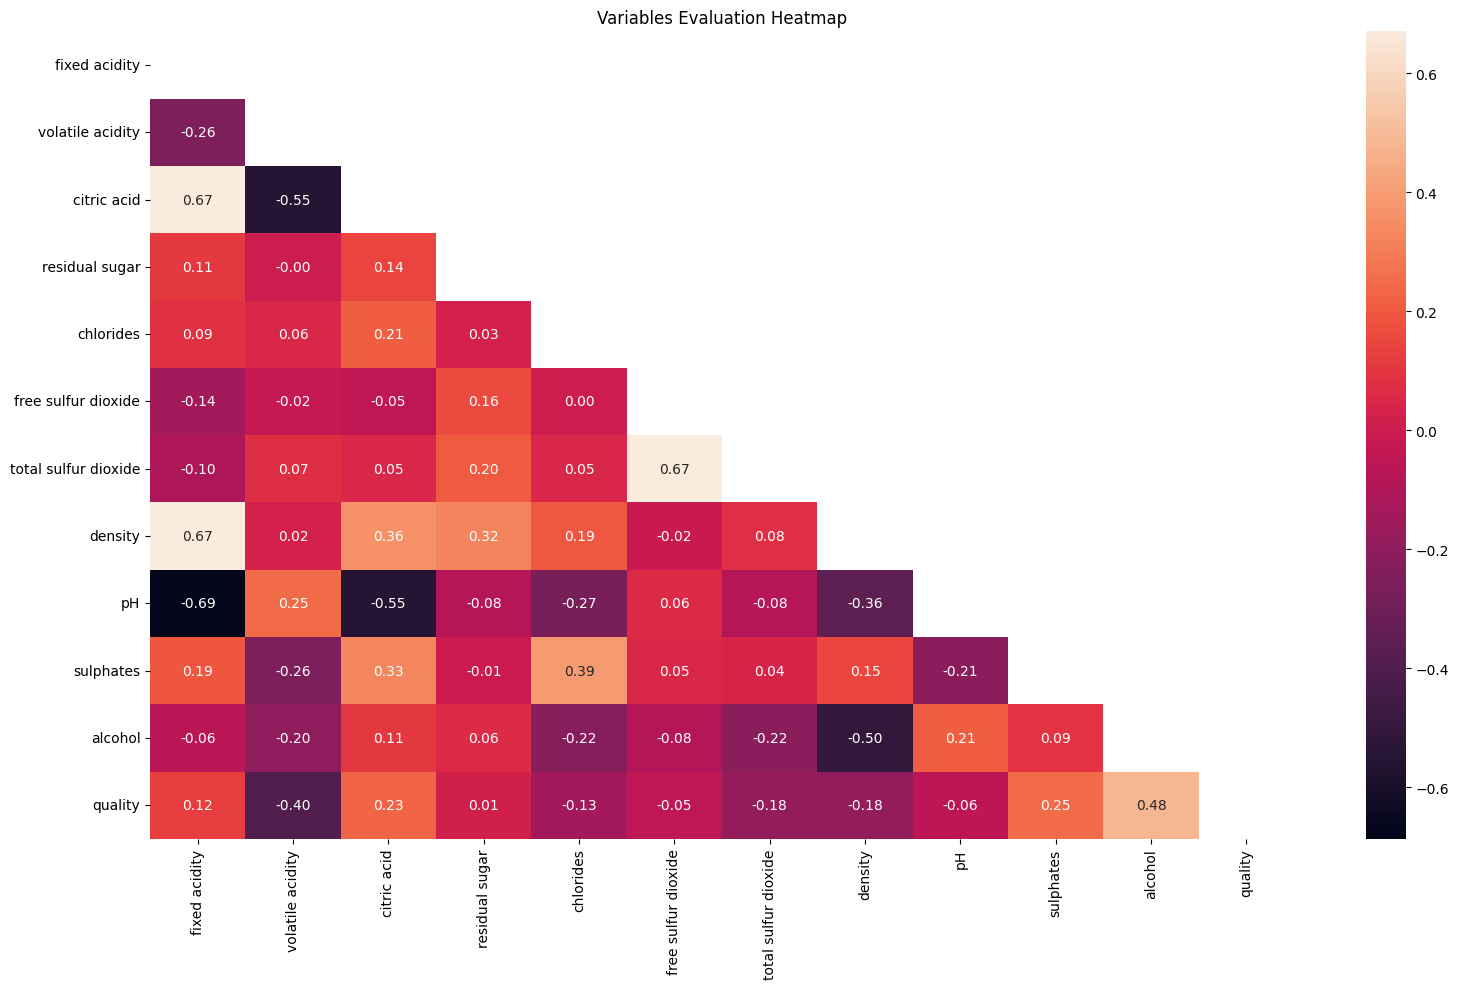

In [81]:
plt.figure(figsize=(16,10))
columns = total_data.columns
sns.heatmap(total_data[columns].corr(), annot = True, fmt = ".2f", mask=np.triu(total_data[columns].corr()))
plt.title('Variables Evaluation Heatmap')
plt.tight_layout()
plt.show()

**Conclusions:**

- **Strongest Positive Correlation with 'Quality'**: `alcohol` with a 0.48 is the most important variable to determine the quality of a red wine.
- **Moderates Positive Correlations with 'Quality'**: `sulphates` (0.25) and `citric acid` (0.23) are important for determining the quality of red wine because they play crucial roles in preservation and balance. The first acts preserving the quality of the wine and adding antioxidants which are importants to prevent oxidation of the wine and the body of the consumer. Also prevents the growth of unwanted yeasts and bacteria. `citric acid`, if well-balanced, plays a crucial role on the taste.
- **Strongest Negative Correlation with 'Quality'**: `volatile acidity` (-0.40) this is expected as this gives a 'vinegar' taste and smell which is not tasty.
- **Moderates Negative Correlations with 'Quality'**: `total sulfur dioxide` (-0.18), `density` (-0.18) and `chlorides` (-0.13). The first give a bad taste, the second is expected as we can see the inverse relationship between `alcohol` and `density` whjen `alcohol` is an important factor to the quality of the red wine. The third contributes to the wine's saltiness and saltiness isn't a expected savour to a red wine.


**Additional Conclusions:**

- **Fixed Acidity vs. pH**: "A significant negative correlation (-0.69) exists between `fixed acidity` and `pH`. As acidity increases, the pH decreases. This inverse relationship is a key indicator of a balanced wine.
- **Density vs Alcohol:** We observe a strong negative correlation (-0.50) between `density` and `alcohol`. This is expected as alcohol is less dense than water.

### 5.3 Pairplot Analysis <a id='c5-3'></a>

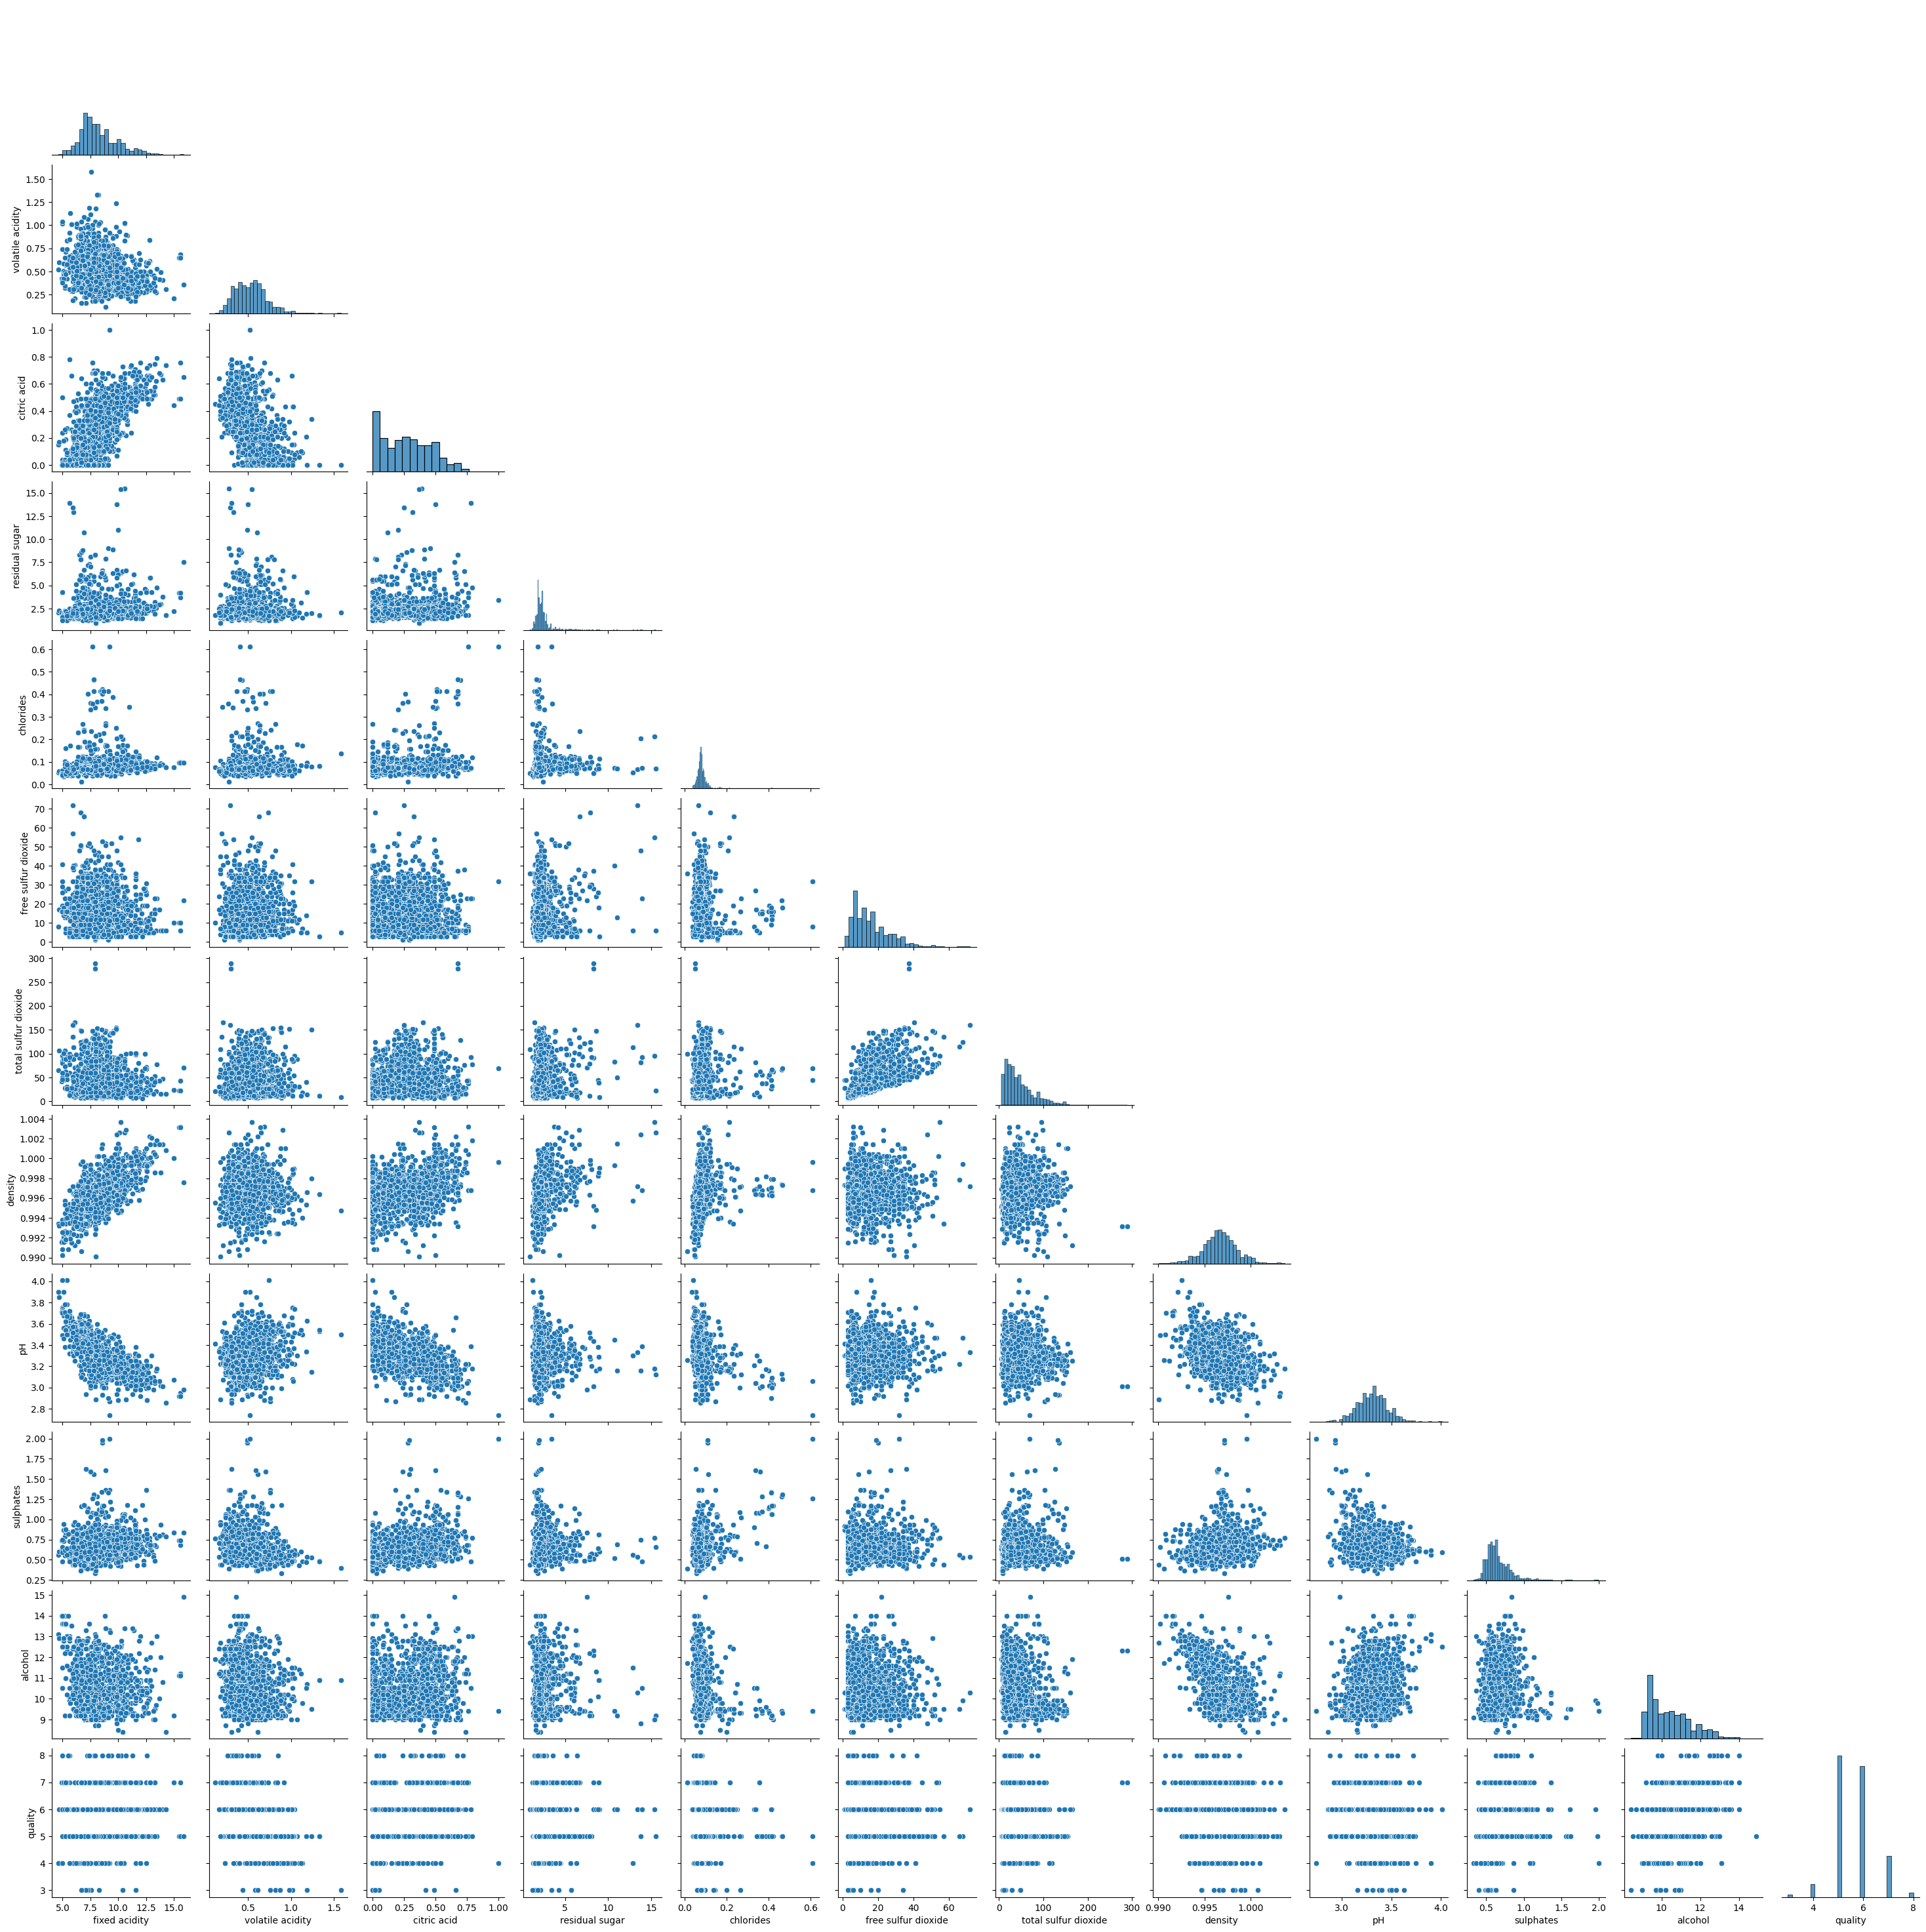

In [82]:
sns.pairplot(data = total_data, corner=True)

## 6. Feature Engineering <a id='c6'></a>

### 6.1 Outliers Analysis <a id='c6-1'></a>

In [83]:
total_data.describe().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00
mean,8.31,0.53,0.27,2.52,0.09,15.89,46.83,1.00,3.31,0.66,10.43,5.62
std,1.74,0.18,0.20,1.35,0.05,10.45,33.41,0.00,0.16,0.17,1.08,0.82
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.43,2.60,0.09,21.00,63.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


We have to remove outliers from all variables except the target variable `quality`

In [84]:
total_data_WITH_outliers = total_data.copy()

total_data_WITHOUT_outliers = total_data.copy()

def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0: lower_limit = min(df[column])
  # Remove upper outliers
  df[column] = df[column].apply(lambda x: (x if (x <= upper_limit) else upper_limit) if not pd.isna(x) else np.nan)
  # Remove lower outliers
  df[column] = df[column].apply(lambda x: (x if (x >= lower_limit) else lower_limit) if not pd.isna(x) else np.nan)
  return df.copy(), {"lower_limit": lower_limit, "upper_limit": upper_limit}

outliers_dict = {}

output_dir = os.path.join('outliers_lims')
os.makedirs(output_dir, exist_ok=True)

for column in total_data.columns:
  total_data_WITHOUT_outliers, limit_list = replace_outliers_from_column(column, total_data_WITHOUT_outliers)
  outliers_dict[column] = limit_list
  filename_outliers = f'./outliers_lims/{column}.json'
  with open(filename_outliers, "w") as f:
        json.dump(limit_list, f, indent=4)


Below we'll show the difference between both dataframes (with outliers and without outliers)

In [85]:
total_data_WITHOUT_outliers

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6.0
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


In [86]:
total_data_WITH_outliers

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### 6.2 Missing Values Analysis <a id='c6-2'></a>

We don't have any missing values in this dataset, so we don't need to do anything.

In [87]:
total_data_WITH_outliers.isnull().sum().sort_values(ascending=False)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### 6.3 Split train/test of both Data Frames <a id='c6-3'></a>

A crucial step in data preparation is splitting the dataset into training (train) and testing (test) sets. This is vital for two main reasons:

- **Prevent Overfitting**: It ensures the model learns generalizable patterns from the train set rather than simply memorizing noise or specific training examples.

- **Evaluate Generalization**: By assessing performance on the unseen test set, we gain a realistic estimate of how well the model will perform on new, real-world data.

In [88]:
def split(target, df, reference: str, test_size=0.2, random_state=123):
    X = df.drop(columns=target)
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    X_train = X_train.reset_index(drop=True)
    X_test = X_test.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    y_test = y_test.reset_index(drop=True)

    X_train.to_excel(f'../data/processed/X_train_{reference}.xlsx', index=False)
    X_test.to_excel(f'../data/processed/X_test_{reference}.xlsx', index=False)
    y_train.to_excel('../data/processed/y_train.xlsx', index=False)
    y_test.to_excel('../data/processed/y_test.xlsx', index=False)

    return X_train, X_test, y_train, y_test

In [89]:
X_train_with_outliers, X_test_with_outliers, y_train, y_test = split('quality', total_data_WITH_outliers, 'with_outliers')
X_train_without_outliers, X_test_without_outliers, _, _ = split('quality', total_data_WITHOUT_outliers, 'without_outliers')

try:
    X_train_with_outliers = pd.read_excel('../data/processed/X_train_with_outliers.xlsx')
    X_train_without_outliers = pd.read_excel('../data/processed/X_train_without_outliers.xlsx')

    X_test_with_outliers = pd.read_excel('../data/processed/X_test_with_outliers.xlsx')
    X_test_without_outliers = pd.read_excel('../data/processed/X_test_without_outliers.xlsx')


    y_train = pd.read_excel('../data/processed/y_train.xlsx').squeeze()
    y_test = pd.read_excel('../data/processed/y_test.xlsx').squeeze()

    print("All .xlsx variables readed successfully")

except FileNotFoundError:
    print("Error: Not all preprocessed data files were found..")
except Exception as e:
    print("Unexpected error: ", e)

All .xlsx variables readed successfully


## 7. Data Processing <a id='c7'></a>

### 7.1 Normalization <a id='c7-1'></a>

We'll proceede to normalize and save both dataframes with and without outliers

In [90]:
def norm(X_train:pd.DataFrame, X_test:pd.DataFrame, reference:str):
    scaler = StandardScaler()
    scaler.fit(X_train)

    scaler_filename = os.path.join('../models', f'scaler_{reference}.pkl')
    with open(scaler_filename, "wb") as file:
        pickle.dump(scaler, file)

    X_train_norm = scaler.transform(X_train)
    X_train_norm = pd.DataFrame(X_train_norm, index=X_train.index, columns=X_train.columns)
    X_train_norm.to_excel(f'../data/processed/X_train_{reference}_norm.xlsx', index=False)

    X_test_norm = scaler.transform(X_test)
    X_test_norm = pd.DataFrame(X_test_norm, index=X_test.index, columns=X_test.columns)
    X_test_norm.to_excel(f'../data/processed/X_test_{reference}_norm.xlsx', index=False)

    return X_train_norm, X_test_norm

X_train_with_outliers_norm, X_test_with_outliers_norm = norm(X_train_with_outliers, X_test_with_outliers, 'with_outliers')
X_train_without_outliers_norm, X_test_without_outliers_norm = norm(X_train_without_outliers, X_test_without_outliers, 'without_outliers')

X_train_without_outliers_norm.head()

try:
    X_train_with_outliers_norm = pd.read_excel('../data/processed/X_train_with_outliers_norm.xlsx')
    X_train_without_outliers_norm = pd.read_excel('../data/processed/X_train_without_outliers_norm.xlsx')

    X_test_with_outliers_norm = pd.read_excel('../data/processed/X_test_with_outliers_norm.xlsx')
    X_test_without_outliers_norm = pd.read_excel('../data/processed/X_test_without_outliers_norm.xlsx')

    print("All .xlsx variables readed successfully")

except FileNotFoundError:
    print("Error: Not all preprocessed data files were found..")
except Exception as e:
    print("Unexpected error: ", e)

All .xlsx variables readed successfully


### 7.2 Minmax Scalation <a id='c7-2'></a>

In [91]:
def minmax(X_train:pd.DataFrame, X_test:pd.DataFrame, reference:str):
    scaler = MinMaxScaler()
    scaler.fit(X_train)

    scaler_filename = os.path.join('../models', f'scaler_{reference}.pkl')
    with open(scaler_filename, "wb") as file:
        pickle.dump(scaler, file)

    X_train_minmax = scaler.transform(X_train)
    X_train_minmax = pd.DataFrame(X_train_minmax, index = X_train.index, columns=X_train.columns)
    X_train_minmax.to_excel(f'../data/processed/X_train_{reference}_minmax.xlsx', index=False)

    X_test_minmax = scaler.transform(X_test)
    X_test_minmax = pd.DataFrame(X_test_minmax, index = X_test.index, columns=X_test.columns)
    X_test_minmax.to_excel(f'../data/processed/X_test_{reference}_minmax.xlsx', index=False)

    return X_train_minmax, X_test_minmax

X_train_with_outliers_minmax, X_test_with_outliers_minmax = minmax(X_train_with_outliers, X_test_with_outliers, 'with_outliers')
X_train_without_outliers_minmax, X_test_without_outliers_minmax = minmax(X_train_without_outliers, X_test_without_outliers, 'without_outliers')

X_train_without_outliers_minmax.head()

try:
    X_train_with_outliers_minmax = pd.read_excel('../data/processed/X_train_with_outliers_minmax.xlsx')
    X_train_without_outliers_minmax = pd.read_excel('../data/processed/X_train_without_outliers_minmax.xlsx')

    X_test_with_outliers_minmax = pd.read_excel('../data/processed/X_test_with_outliers_minmax.xlsx')
    X_test_without_outliers_minmax = pd.read_excel('../data/processed/X_test_without_outliers_minmax.xlsx')

    print("All .xlsx variables readed successfully")

except FileNotFoundError:
    print("Error: Not all preprocessed data files were found..")
except Exception as e:
    print("Unexpected error: ", e)

All .xlsx variables readed successfully


## 8. Machine Learning <a id='c8'></a>

### 8.1 Which is the best dataset? <a id='c8-1'></a>

The next step is to choose the best dataset

In [92]:
results = []

dataset_references = {
    "X_train_with_outliers": (X_train_with_outliers, X_test_with_outliers),
    "X_train_without_outliers": (X_train_without_outliers, X_test_without_outliers),
    "X_train_with_outliers_norm": (X_train_with_outliers_norm, X_test_with_outliers_norm),
    "X_train_without_outliers_norm": (X_train_without_outliers_norm, X_test_without_outliers_norm),
    "X_train_with_outliers_minmax": (X_train_with_outliers_minmax, X_test_with_outliers_minmax),
    "X_train_without_outliers_minmax": (X_train_without_outliers_minmax, X_test_without_outliers_minmax),
}

for dataset_name, (X_train, X_test) in dataset_references.items():
    model = KNeighborsRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results.append({
        "dataset_name": dataset_name,
        "r2": r2,
        "mse": mse,
        "mae": mae
    })

results_df = pd.DataFrame(results).sort_values(by='mse', ascending=True)
print(results_df)
winning_dataset_name = results_df.iloc[0]["dataset_name"]
winning_score = results_df.iloc[0]["mse"]
winning_dataset_X_train, best_X_test = dataset_references[winning_dataset_name]
print(f'The best dataset is {winning_dataset_name} with an mse score of {winning_score:.4f}')

                      dataset_name        r2       mse       mae
5  X_train_without_outliers_minmax  0.350649  0.380699  0.484926
3    X_train_without_outliers_norm  0.326193  0.395037  0.495221
2       X_train_with_outliers_norm  0.268877  0.428640  0.500368
4     X_train_with_outliers_minmax  0.255269  0.436618  0.502941
0            X_train_with_outliers  0.184658  0.478015  0.532353
1         X_train_without_outliers  0.182087  0.479522  0.545956
The best dataset is X_train_without_outliers_minmax with an mse score of 0.3807


### 8.2 Model Optimization <a id='c8-2'></a>

In [93]:
param_grid = {
    'n_neighbors': range(1, 29),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski', 'chebychev']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1)

grid_search.fit(winning_dataset_X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best hyperparameters: {best_params}")
print(f"Best MSE (Score): {-best_score:.4f}")

Fitting 5 folds for each of 224 candidates, totalling 1120 fits
Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 26, 'weights': 'distance'}
Best MSE (Score): 0.4156


As the model optimization did not improve the model's performance, we will keep the original best dataset, as determined by the lowest MSE.

### 8.3 Evaluation of the Model <a id='c8-3'></a>

In [95]:
best_model = KNeighborsRegressor(n_neighbors=best_params['n_neighbors'],
                                 weights=best_params['weights'],
                                 metric=best_params['metric'])
best_model.fit(winning_dataset_X_train, y_train)

y_pred = best_model.predict(best_X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"R2 Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

with open('../models/best_knn_regressor_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

R2 Score: 0.3645
Mean Squared Error (MSE): 0.3726
Mean Absolute Error (MAE): 0.4901
